In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [8]:
df = pd.read_csv("../data/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.shape()

TypeError: 'tuple' object is not callable

In [ ]:
df.describe()

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [10]:
df.columns = ( df.columns
               .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("-", "_") )
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales'],
      dtype='object')

In [11]:
df[['order_date', 'ship_date']].head()

,order_date,ship_date
0,08/11/2017,11/11/2017
1,08/11/2017,11/11/2017
2,12/06/2017,16/06/2017
3,11/10/2016,18/10/2016
4,11/10/2016,18/10/2016


In [12]:
df["order-date"] =pd.to_datetime(df["order_date"],format = "mixed",dayfirst = False )

df["order-date"].head()

0   2017-08-11
1   2017-08-11
2   2017-12-06
3   2016-11-10
4   2016-11-10
Name: order-date, dtype: datetime64[ns]

In [13]:
df['year'] = df['order-date'].dt.year
df['year'].head()

0    2017
1    2017
2    2017
3    2016
4    2016
Name: year, dtype: int32

In [14]:
df['month'] = df['order-date'].dt.month
df['month'].head()

0     8
1     8
2    12
3    11
4    11
Name: month, dtype: int32

In [15]:
df["order-date"].head(20)

0    2017-08-11
1    2017-08-11
2    2017-12-06
3    2016-11-10
4    2016-11-10
5    2015-09-06
6    2015-09-06
7    2015-09-06
8    2015-09-06
9    2015-09-06
10   2015-09-06
11   2015-09-06
12   2018-04-15
13   2017-05-12
14   2016-11-22
15   2016-11-22
16   2015-11-11
17   2015-05-13
18   2015-08-27
19   2015-08-27
Name: order-date, dtype: datetime64[ns]

In [16]:
df['day'] = df['order-date'].dt.day
df['day'].head()

0    11
1    11
2     6
3    10
4    10
Name: day, dtype: int32

In [17]:
monthly_sales = (
    df.groupby(['year','month'])['sales'].sum()
               .reset_index()
              )
monthly_sales
# Group Sales by Month and Year
#We group the data to analyze trends over time.


,year,month,sales
0,2015,1,28828.2540
1,2015,2,12588.4840
2,2015,3,54027.6920
3,2015,4,24710.0160
4,2015,5,29520.4900
5,2015,6,29181.3346
6,2015,7,35194.5580
7,2015,8,37349.2655
8,2015,9,65956.3998
9,2015,10,34561.9470


In [18]:
yearly_sales = (
    df.groupby(['year'])['sales'].sum()
               .reset_index()
              )
yearly_sales 
#group sales by year separately


,year,sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


In [19]:
monthly_sales = monthly_sales.sort_values(['year', 'month'])
monthly_sales


,year,month,sales
0,2015,1,28828.2540
1,2015,2,12588.4840
2,2015,3,54027.6920
3,2015,4,24710.0160
4,2015,5,29520.4900
5,2015,6,29181.3346
6,2015,7,35194.5580
7,2015,8,37349.2655
8,2015,9,65956.3998
9,2015,10,34561.9470


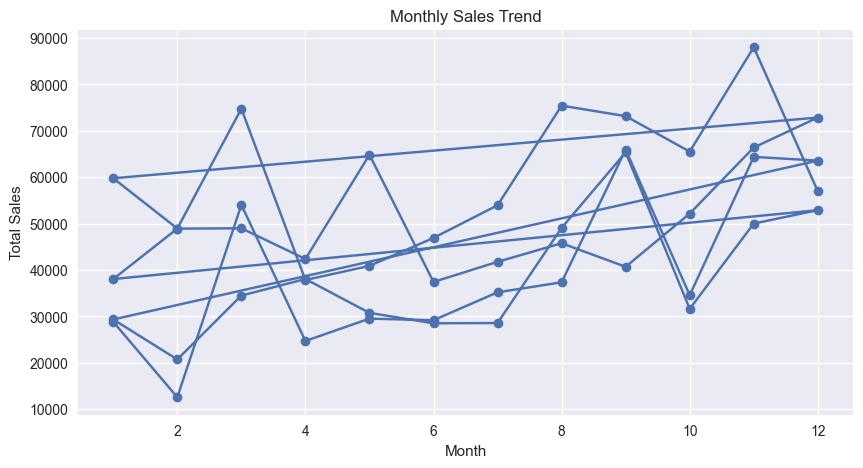

In [20]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['month'], monthly_sales['sales'], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [25]:
pivot_sales = monthly_sales.pivot(
    index='month',
    columns='year',
    values='sales'
)
pivot_sales


year,2015,2016,2017,2018
month,,,,
1,28828.2540,29347.3864,38048.1840,59767.0910
2,12588.4840,20728.3520,48907.5900,48928.8334
3,54027.6920,34489.6776,48990.1410,74748.6238
4,24710.0160,38056.9685,42368.0480,37849.2156
5,29520.4900,30761.5585,64836.2518,40882.4464
6,29181.3346,28515.9082,37424.6810,46912.8475
7,35194.5580,28573.3100,41761.9430,53942.7755
8,37349.2655,49076.9300,45766.8144,75408.7840
9,65956.3998,65352.9970,40692.3063,73153.3640


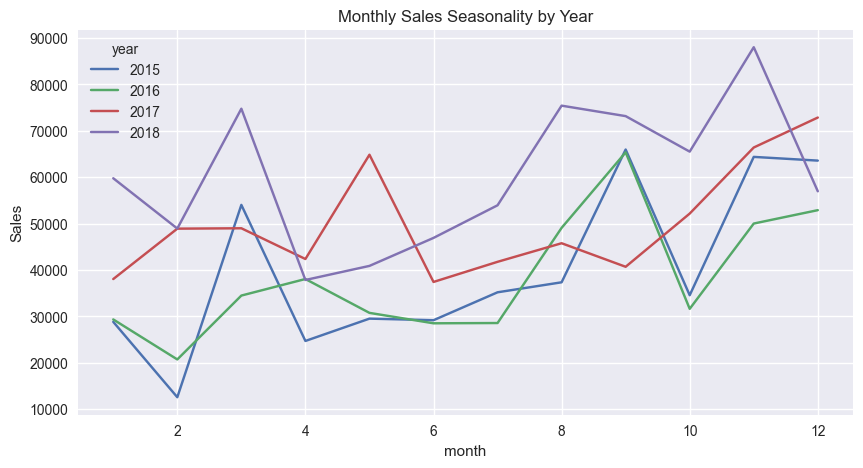

In [26]:
pivot_sales.plot(figsize=(10,5))
plt.title("Monthly Sales Seasonality by Year")
plt.xlabel("month")
plt.ylabel("Sales")
plt.show()
#analyze seasonal sales 
#To identify the highest performing season


In [ ]:
# Sales show consistent peaks towards the end of the year ,
# indicating strong seasonal demand during festive periods.


In [30]:
region_summary = (
    df.groupby('region')[['sales']]
      .sum()
      .sort_values(by='sales', ascending=False)

)
region_summary



,sales
region,
West,710219.6845
East,669518.7260
Central,492646.9132
South,389151.4590


In [31]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'order-date', 'year', 'month', 'day'],
      dtype='object')

Text(0, 0.5, 'sales')

<Figure size 800x400 with 0 Axes>

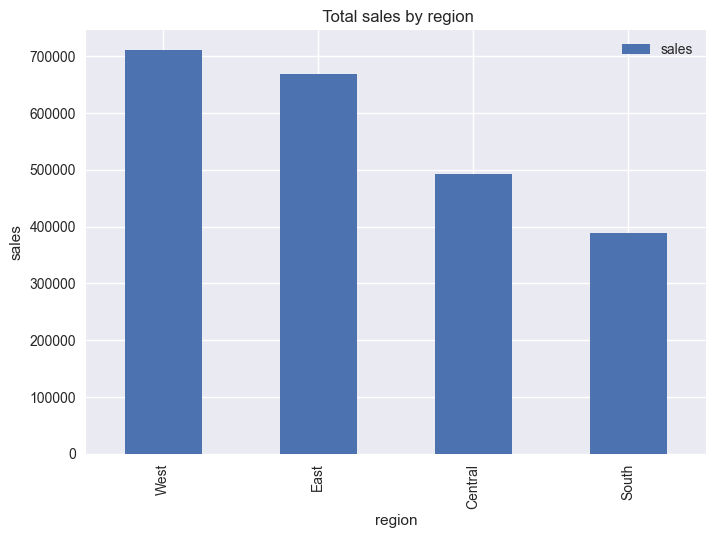

In [32]:
plt.figure(figsize=(8,4))
region_summary.plot(kind ="bar")
plt.title(" Total sales by region")
plt.xlabel("region")
plt.ylabel("sales")


In [ ]:
# The West region contributes the highest share of total sales,
# indicating strong customer demand.
# The Central region lags behind, suggesting potential for market expansion
# or weaker regional demand.
